## I. Apprentissage supervisé : Feature engineering et Classification

L’objectif dans cette partie est de construire un bon classifieur sur un jeu de données de crédit scoring du
fichier `"credit_scoring.csv".`
1. Chargement des données et préparation : Dans un premier temps nous allons importer le jeu de données
et analyser ses caractéristiques.
    * Importer ce jeu de données avec la librairie pandas (c.f. read_csv)
    * Transformer votre jeu de données issue de pandas qui sera de type Data Frame en numpy Array
(c.f. values) et séparer ensuite les variables caractéristiques de la variable à prédire (status) en
deux tableaux différents.
    * Analyser les propriétés de vos données : taille de l’échantillon (c.f. shape), nombre d’exemples
positifs et négatifs (c.f. hist).
    * Pour éviter d’avoir un résultat biaisé du classifieur que nous allons construire, séparer les données
en deux partie une dite d’apprentissage qui servira à l’apprentissage du classifieur et l’autre dite
de test qui servira à son évaluation (c.f. train_test_split).

2. Apprentissage et évaluation de modèles : Utiliser ensuite sur votre jeu de données les algorithmes
d’apprentissage supervisé suivants :
    * Un arbre CART
    * k-plus-proches-voisins avec k=5
L’objectif est à présent de comparer les résultats obtenus à l’aide de ces deux simples algorithmes sur ce jeu de
données. Cette comparaison s’appuiera sur l’estimation de l’accuracy.

3. Normalisation des variables continues : Certains algorithmes d’apprentissage supervisé fonctionneront
mieux si les données sont normalisées (centrées autour de 0) pour que toutes les variables caractéristiques
auront le même poids dans la phase d’apprentissage. Utiliser le module StandardScaler de Scikit-learn
pour normaliser vos données. Vous pouvez également tester le module MinMaxScaler. Exécuter à
nouveau votre code sur vos données une fois normalisées. Interpréter les résultats obtenus en les
comparant avec ceux de la question précédente.

4. Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales : Il est
parfois utile pour certains classifieurs de faire une réduction de dimensions sur les données afin de déceler
et créer certaines combinaisons linéaires dans les variables descriptives et augmenter ainsi le pouvoir
discriminant du classifieur. Appliquer une ACP (module PCA de Scikit-learn) sur vos données et garder les k
premières nouvelles dimensions en les concaténant à vos données normalisées de l’étape précédente.

Exécuter à nouveau votre code sur vos nouvelles données. Que se passe t-il ?

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/credit_scoring.csv', delimiter=';')

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seniority  4375 non-null   float64
 1   Home       4375 non-null   float64
 2   Time       4375 non-null   float64
 3   Age        4375 non-null   float64
 4   Marital    4375 non-null   float64
 5   Records    4375 non-null   float64
 6   Job        4375 non-null   float64
 7   Expenses   4375 non-null   float64
 8   Income     4375 non-null   float64
 9   Assets     4375 non-null   float64
 10  Debt       4375 non-null   float64
 11  Amount     4375 non-null   float64
 12  Price      4375 non-null   float64
 13  Status     4375 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 478.6 KB


,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
count,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000
mean,7.985143,0.528229,46.518857,37.021714,0.271086,1.172114,0.364114,55.595200,130.848914,5298.431314,342.551543,1037.463771,1459.732343,0.722057
std,8.173922,0.499260,14.619282,10.973187,0.444571,0.377523,0.481236,19.451569,86.199518,10582.377366,1217.622800,469.753531,621.775995,0.448036
min,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000,0.000000
25%,2.000000,0.000000,36.000000,28.000000,0.000000,1.000000,0.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1116.500000,0.000000
50%,5.000000,1.000000,48.000000,36.000000,0.000000,1.000000,0.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000,1.000000
75%,12.000000,1.000000,60.000000,45.000000,1.000000,1.000000,1.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1688.000000,1.000000
max,48.000000,1.000000,72.000000,68.000000,1.000000,2.000000,1.000000,173.000000,959.000000,250000.000000,30000.000000,4500.000000,11140.000000,1.000000


In [4]:
# Separate features (X) and target (y)
X = df.drop('Status', axis=1).values
y = df['Status'].values

In [5]:
# Sample size
sample_size = X.shape[0]

# Number of positive examples
num_positive = np.sum(y) # Assuming 'status' is 1 for positive and 0 for negative
# or num_positive = (y == 1).sum()

# Number of negative examples
num_negative = sample_size - num_positive
# or num_negative = (y == 0).sum() # This version uses boolean indexing

# Display results
print(f"Sample size: {sample_size}")
print(f"Number of positive examples: {num_positive}")
print(f"Number of negative examples: {num_negative}")

Sample size: 4375
Number of positive examples: 3159
Number of negative examples: 1216


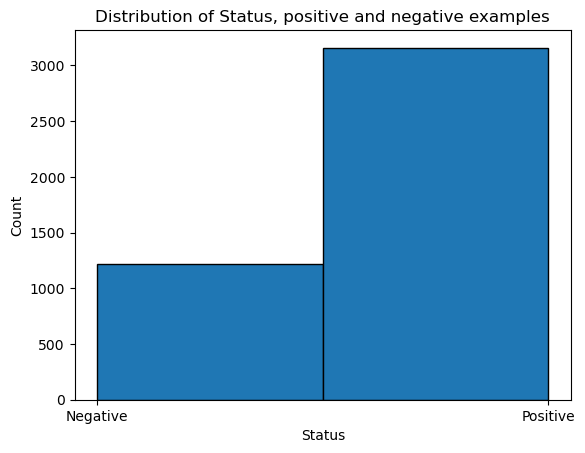

In [6]:
# Visualize with a histogram
plt.hist(y, bins=2 , edgecolor='black')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status, positive and negative examples')
plt.show();

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
# Create a Decision Tree classifier object and train it:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn= accuracy_score(y_test, y_pred_knn)

In [12]:
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"k-NN Accuracy: {accuracy_knn}")

Decision Tree Accuracy: 0.7302857142857143
k-NN Accuracy: 0.7028571428571428


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)
accuracy_dt_scaled = accuracy_score(y_test, y_pred_dt)

print("Précision de l'arbre de décision (normalisé) :", accuracy_dt_scaled)

Précision de l'arbre de décision (normalisé) : 0.728


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)

accuracy_knn_scaled = accuracy_score(y_test, y_pred_knn)

print("Précision de l'arbre de décision knn (normalisé) :", accuracy_knn_scaled)

Précision de l'arbre de décision knn (normalisé) : 0.7702857142857142


In [15]:
from sklearn.decomposition import PCA

# Réduction de dimension avec PCA
k = 5
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train_scaled)# Ajustez PCA aux données d'entraînement normalisées
X_test_pca = pca.transform(X_test_scaled)# Transformez les données de test normalisées

# Réexécution des modèles sur les données aprés PCA
dt_classifier.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_classifier.predict(X_test_pca)
accuracy_dt_pca = accuracy_score(y_test, y_pred_dt_pca)

print("Précision de l'arbre de décision (PCA) :", accuracy_dt_pca)

knn_classifier.fit(X_train_pca, y_train)
y_pred_knn_pca= knn_classifier.predict(X_test_pca)
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)

print("Précision de k-NN (PCA) :", accuracy_knn_pca)

Précision de l'arbre de décision (PCA) : 0.7005714285714286
Précision de k-NN (PCA) : 0.7542857142857143
